In [59]:
%reload_ext autoreload
%autoreload 2

In [1]:
import sounddevice as sd
import matplotlib.pyplot as plt

# list_devices()
dev_in = sd.query_devices("micArray16")
dev_out = sd.query_devices("default") # for Black USB-cable speaker
# dev_out = sd.query_devices("UACDemo") # for Black USB-cable speaker

input_device_id = dev_in['index']
output_device_id = dev_out['index']
print(f"Found devices: in:{input_device_id} out:{output_device_id}")

# default settings
Fs       = 48000
nchan    = 16
sd.default.samplerate = Fs
sd.default.channels = nchan
sd.default.device = [input_device_id, output_device_id]

npt = 128*1024 # per channel
dur = npt/Fs

# print(">>> Start recording for %5.2fs (%d samples per ch)" % (dur, npt))
# rec = sd.rec(npt, device = indev)
# sd.wait()
print(sd.query_devices())
print("Done.")

Found devices: in:0 out:2
> 0 nanoSHARC micArray16 UAC2.0: USB Audio (hw:2,0), ALSA (16 in, 0 out)
  1 pulse, ALSA (32 in, 32 out)
< 2 default, ALSA (32 in, 32 out)
Done.


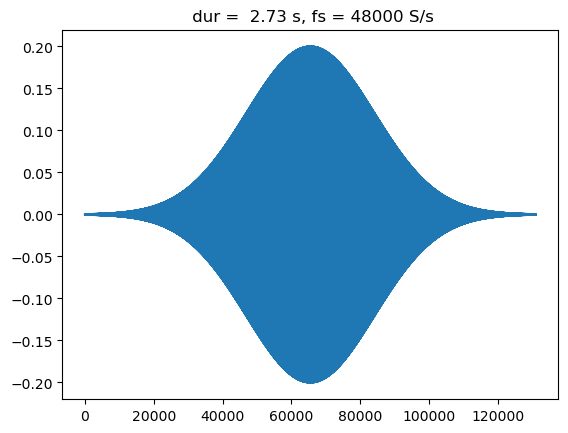

In [2]:
import numpy as np
from signals import SineWave, PulseWave

# outsmp = SineWave(npt, Fs, 1600, amp=0.2)
outsmp = PulseWave(npt, Fs, 1000, amp=0.2)

# Plot output wave
plt.close("all")
plt.plot(outsmp, '-')
plt.title(" dur = %5.2f s, fs = %5.0f S/s" % (dur, Fs))
plt.show()

In [4]:
sd.play(outsmp)

playrec:


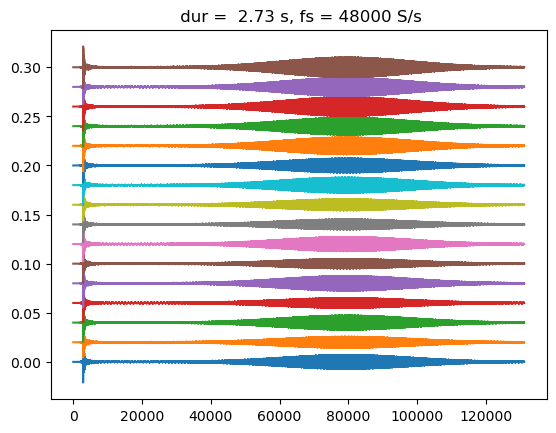

done.


In [4]:
# print("play:")
# sd.play(outsmp)
# print("rec:")
# insmp = sd.rec(npt)
print("playrec:")
insmp = sd.playrec(outsmp, samplerate=Fs)
sd.wait()

off = 0.02
plt.close("all")
for chn in range(nchan):
    plt.plot(insmp[:,chn]+chn*off, '-')
plt.title(" dur = %5.2f s, fs = %5.0f S/s" % (dur, Fs))
plt.show()

print("done.")